In [1]:
import os
import PIL
import shutil
import pathlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential,save_model

In [3]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

In [4]:
data_dir = tf.keras.utils.get_file("flower_photos", origin= dataset_url,untar=True)

228813984/228813984 [==============================] - 2s 0us/step


In [5]:
type(data_dir)

str

In [6]:
data_dir = pathlib.Path(data_dir)


In [7]:
image_count =len(list(data_dir.glob("*/*.jpg")))
image_count

3670

In [8]:
batch_size = 32
img_height =180
img_width = 180

In [9]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset = "training",
    seed = 123,
    image_size=(img_height,img_width),
    batch_size = batch_size

)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [10]:
vals_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset = "validation",
    seed = 123,
    image_size=(img_height,img_width),
    batch_size = batch_size
)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [11]:
2936 + 734

3670

In [12]:
class_names = train_ds.class_names
print("class_names:",class_names)

class_names: ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


In [13]:

train_ds = train_ds.cache().shuffle(1000)
#help in retrieve process and store output after 1 epoch
vals_ds=vals_ds.cache()

In [14]:
numclasses = len(class_names)
numclasses

5

In [15]:
# modeling
model = Sequential([
    layers.experimental.preprocessing.Rescaling(1./255,input_shape=(img_height,img_width,3)),

    layers.Conv2D(16,3,padding= "same" , activation="relu"),
    layers.MaxPool2D(),

    layers.Conv2D(32,3,padding= "same" , activation="relu"),
    layers.MaxPool2D(),

    layers.Conv2D(64,3,padding= "same" , activation="relu"),
    layers.MaxPool2D(),

    layers.Flatten(),

    layers.Dense(128,activation="relu"),

    layers.Dense(numclasses)

])

In [16]:
model.compile(
    optimizer = "adam",
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True,reduction='sum_over_batch_size'),#works as activation function
    metrics = ['accuracy']
)

In [17]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [18]:
epochs = 50
history = model.fit(
    train_ds,
    validation_data = vals_ds,
    epochs = epochs
)

Epoch 1/50
92/92 [==============================] - 19s 41ms/step - loss: 1.3043 - accuracy: 0.4349 - val_loss: 1.0867 - val_accuracy: 0.5695
Epoch 2/50
92/92 [==============================] - 2s 21ms/step - loss: 0.9982 - accuracy: 0.6015 - val_loss: 1.0385 - val_accuracy: 0.6035
Epoch 3/50
92/92 [==============================] - 2s 21ms/step - loss: 0.7882 - accuracy: 0.6965 - val_loss: 0.8921 - val_accuracy: 0.6376
Epoch 4/50
92/92 [==============================] - 2s 23ms/step - loss: 0.5926 - accuracy: 0.7847 - val_loss: 0.9932 - val_accuracy: 0.6431
Epoch 5/50
92/92 [==============================] - 2s 22ms/step - loss: 0.3743 - accuracy: 0.8644 - val_loss: 0.9860 - val_accuracy: 0.6676
Epoch 6/50
92/92 [==============================] - 2s 21ms/step - loss: 0.2281 - accuracy: 0.9257 - val_loss: 1.1520 - val_accuracy: 0.6662
Epoch 7/50
92/92 [==============================] - 2s 21ms/step - loss: 0.1287 - accuracy: 0.9619 - val_loss: 1.2485 - val_accuracy: 0.6553
Epoch 8/50
9

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

In [20]:
loss= history.history['loss']
val_loss = history.history['val_loss']

In [21]:
epochs_range= range(epochs)
epochs_range

range(0, 50)

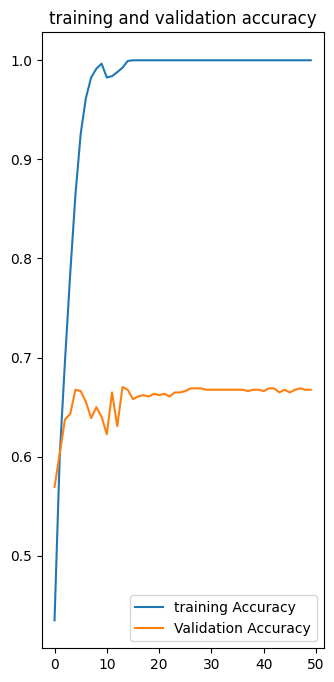

In [22]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label="training Accuracy")
plt.plot(epochs_range,val_acc,label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title("training and validation accuracy")
plt.show()

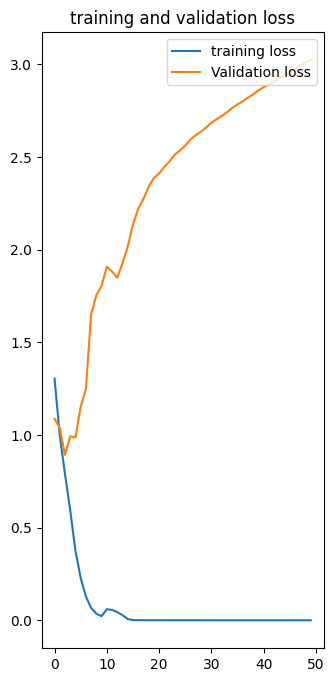

In [23]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,loss,label="training loss")
plt.plot(epochs_range,val_loss,label="Validation loss")
plt.legend(loc="upper right")
plt.title("training and validation loss")
plt.show()

In [24]:
save_model(model,"flower_model_trained.hdf5")
print("model_saved_succesfully")

model_saved_succesfully


<ipython-input-24-e42c8a1d0824>:1: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(model,"flower_model_trained.hdf5")
